## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print results from each csv
print(f"Data Shape Mouse Meta Data: {mouse_metadata.shape}")
print(f"Data Shape Study Results: {study_results.shape}")


Data Shape Mouse Meta Data: (249, 5)
Data Shape Study Results: (1893, 4)


In [3]:
# Combine the data into a single dataset

new_df = pd.merge(mouse_metadata, study_results, how="outer", on='Mouse ID', )

# Display the data table for preview

new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count = new_df['Mouse ID'].count()

mice_count

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = new_df[new_df.duplicated(['Mouse ID', 'Timepoint'])]



In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

single_mouse = new_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])

single_mouse['Mouse ID'].count()

1888

In [17]:
# Checking the number of mice in the clean DataFrame.
count_mice = single_mouse.groupby('Mouse ID')

total_mice = len(count_mice)

total_mice

249

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stats_1 = single_mouse.groupby('Drug Regimen')
first_table = summary_stats_1.agg(['mean', 'median', 'var','std', 'sem'])['Tumor Volume (mm3)']
first_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
group_mean = single_mouse.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
group_median = single_mouse.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
group_var = single_mouse.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
group_std = single_mouse.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
group_sem = single_mouse.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


summary_stats = pd.DataFrame({'Mean': group_mean,
                             'Median': group_median,
                             'Variance': group_var,
                             'Standard Deviance': group_std,
                             'SEM': group_sem})
summary_stats

,Mean,Median,Variance,Standard Deviance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

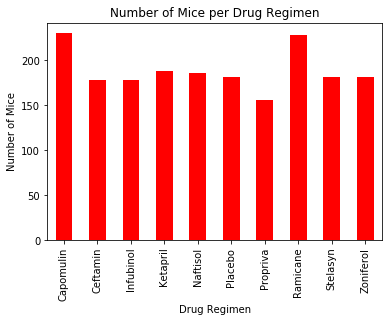

In [34]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#find the number of mice per drug regimen
mice_per_treatment = single_mouse.groupby(['Drug Regimen']).count()['Mouse ID']

#print the number of mice per treatment
mice_per_treatment

#plot using pandas 
mice_per_treatment.plot(kind='bar', color={'red'})

#label data
plt.title('Number of Mice per Drug Regimen')
plt.ylabel('Number of Mice')

#somehow the xaxis is already labeled?

Text(0.5, 0, 'Drug Regimen')

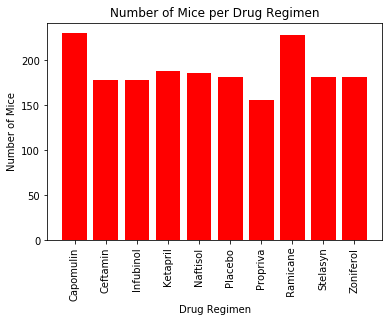

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#find the number of mice per drug regimen
mice_per_treatment = single_mouse.groupby(['Drug Regimen']).count()['Mouse ID']

#create an array 
users = mice_per_treatment
users

x_axis = np.arange(len(users))
x_axis

#plot the data to a bar graph
plt.bar(x=x_axis, height=users, color='r', alpha=1, align='center')

#label the bars
plt.xticks(x_axis, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',' Ramicane', 'Stelasyn', 'Zoniferol'], rotation=90)
plt.title('Number of Mice per Drug Regimen')
plt.ylabel('Number of Mice')
plt.xlabel('Drug Regimen')

Text(0.5, 1.0, 'Gender Distribution of Mice')

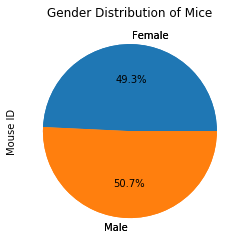

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#find the number of mice per gender
mice_per_gender = single_mouse.groupby(['Sex']).count()['Mouse ID']

mice_per_gender

labels = ['Female', 'Male']
counts = [930, 958]
# colors = ['pink', 'lightskyblue'] obviously this didn't work

#plot using pandas 
mice_per_gender.plot.pie(y='counts')

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution of Mice')



Text(0.5, 1.0, 'Gender Distribution of Mice')

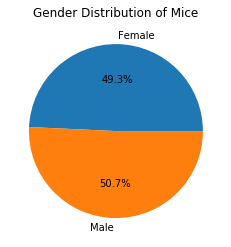

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#find the number of mice per gender
mice_per_gender = single_mouse.groupby(['Sex']).count()['Mouse ID']

mice_per_gender

labels = ['Female', 'Male']
counts = [930, 958]
colors = ['blue', 'orange'] 

#plot using pandas 
plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Gender Distribution of Mice')



## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


KeyError: 'Time point'

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
